# Pendahuluan

󠀰Waralaba pusat kebugaran bernama Model Fitness sedang mengembangkan strategi keterlibatan pelanggan berdasarkan data analitik.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀤󠀳
󠀰Salah satu masalah yang paling sering dijumpai oleh layanan pusat kebugaran dan bahkan layanan lainnya adalah perputaran pelanggan atau customer churn.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀥󠀳󠀰 Bagaimana cara Anda mengetahui bahwa pelanggan sudah berhenti menggunakan layanan Anda?󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀦󠀳󠀰 Anda memang bisa menghitung tingkat churn berdasarkan jumlah orang yang menghapus akun atau tidak memperbarui kontrak langganan mereka.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀧󠀳󠀰 Namun terkadang, Anda tidak bisa mengetahui dengan pasti apakah seorang klien benar-benar telah berhenti: mereka mungkin meninggalkan Anda tanpa sepengetahuan Anda.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀨󠀳
󠀰Indikator churn bisa berbeda dari satu bidang ke bidang lainnya.󠀲󠀡󠀥󠀥󠀧󠀧󠀨󠀩󠀳󠀰 Jika seorang pengguna melakukan pembelian dari toko daring secara tidak rutin tetapi teratur, Anda tidak bisa mengatakan bahwa pengguna tersebut telah meninggalkan toko Anda.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀠󠀳󠀰 Akan tetapi, jika selama dua minggu pengguna tidak membuka kanal toko daring yang diperbarui setiap hari, barulah Anda bisa khawatir: pengikut Anda mungkin sudah bosan dan memutuskan untuk meninggalkan Anda.
󠀰Bagi bisnis pusat kebugaran, pelanggan akan dianggap pergi jika mereka tidak lagi kembali selama satu bulan.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀢󠀳󠀰 Padahal, hal itu belum tentu benar. Seorang pelanggan bisa saja tidak mengunjungi pusat kebugaran selama satu bulan karena dia sedang berlibur, misalnya ke Bali, dan akan kembali mengunjungi pusat kebugaran setelah liburannya usai. Namun, kasus seperti ini memang jarang sekali terjadi.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀣󠀳󠀰 Biasanya jika seorang pelanggan memutuskan untuk bergabung, kemudian datang beberapa kali lalu menghilang, kemungkinan besar pelanggan tersebut tidak akan kembali lagi.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀤󠀳
󠀰Untuk mengurangi tingkat churn, Model Fitness telah melakukan digitalisasi terhadap sejumlah profil pelanggannya.󠀲󠀡󠀥󠀥󠀧󠀧󠀩󠀥󠀳󠀰 Adapun tugas Anda adalah menganalisis profil para pelanggan tersebut dan mengembangkan strategi retensi pelanggan (customer retention).

In [1]:
#memuat library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [2]:
#melakukan load pada dataset
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv')

In [3]:
#melihat tipe data dan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [4]:
#melihat standard deviasi dataset
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
#melihat rata-rata dari setiap churn
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


#### Buat histogram dan distribusi fitur untuk mereka yang keluar (churn) serta mereka yang tinggal.

In [6]:
#fungsi untuk mencari histogram mereka yang tinggal
def histogram(data,churn_group,data_fill):
    for i in data_fill:
        for j in data[churn_group].unique():
            sns.kdeplot(data[data[churn_group]==j][i],
                       label='{} = {}'.format(churn_group,str(j)))
        plt.title(i)
        plt.legend()
        plt.show()

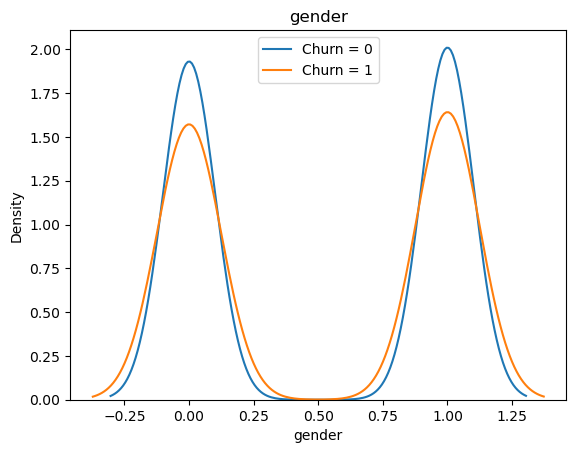

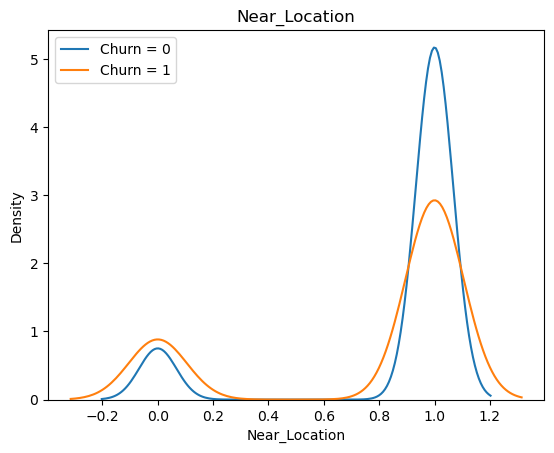

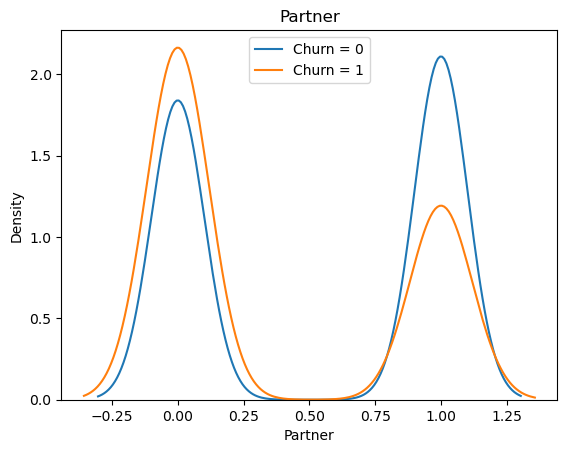

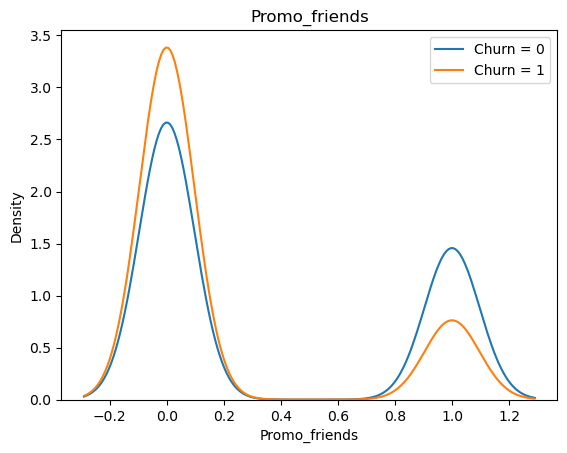

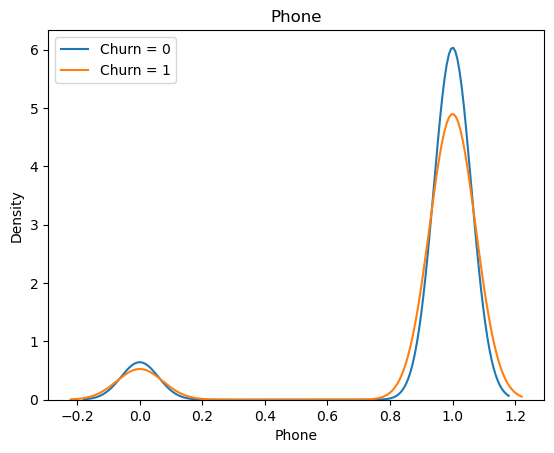

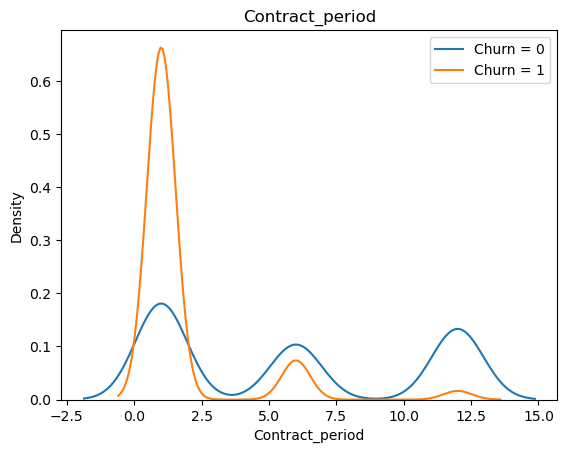

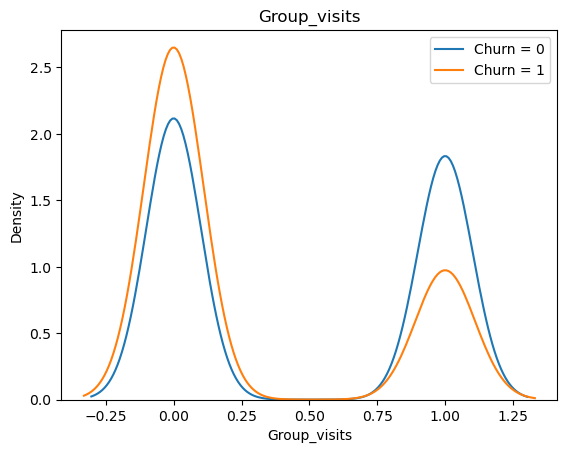

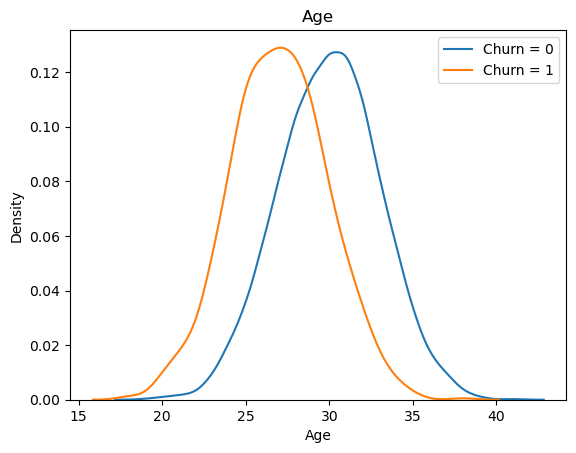

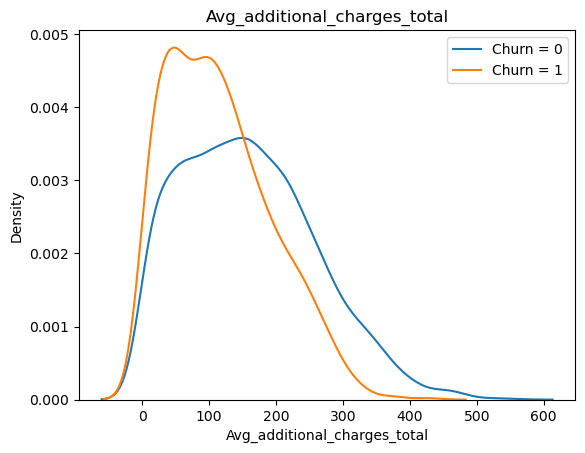

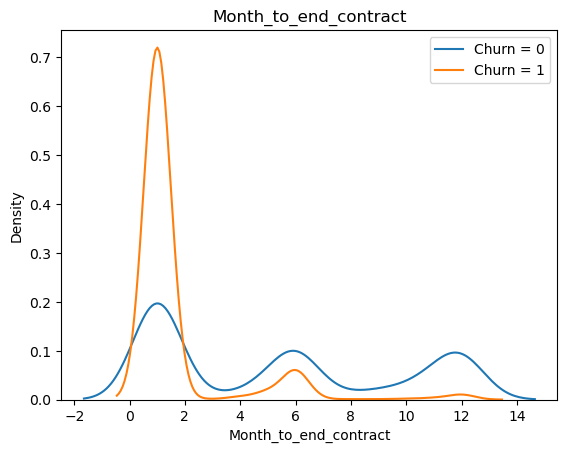

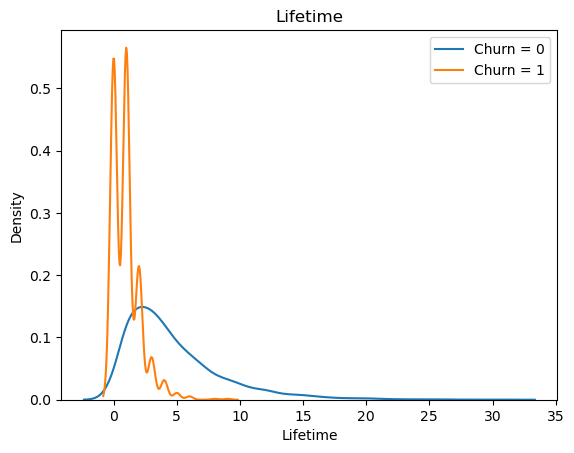

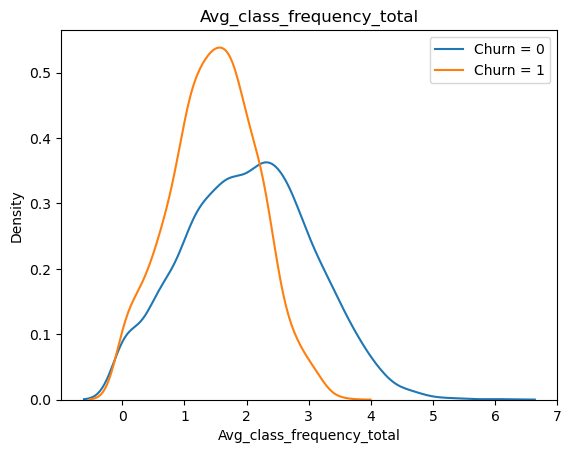

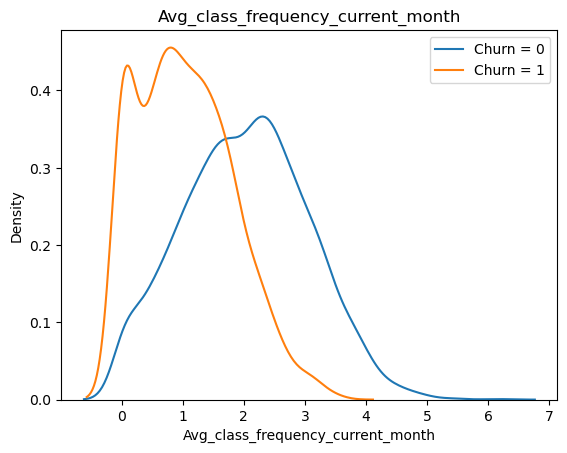

C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


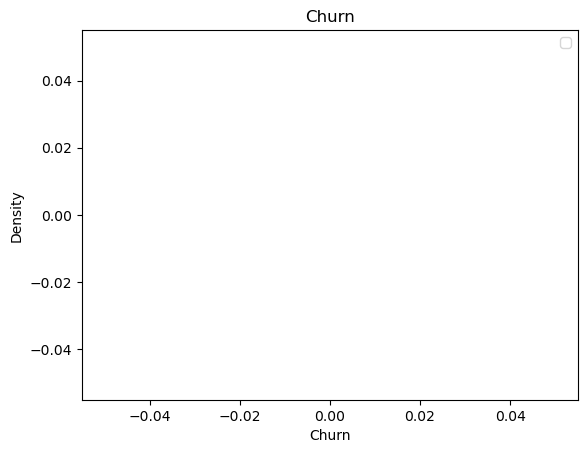

In [7]:
histogram(df,'Churn',df.columns)

hasil untuk masing masing fitur :

Gender : terlihat untuk mereka yang masih jadi member dan yang tidak untuk tingkat distribusinya hampir sama, artinya jumlah pelanggan antara laki-laki dan perempuan pada gym tidak berbeda secara signigikan

Near_Location: pada fitur ini dapat disimpulkan pelanggan yang tempat tinggal dekat dengan gym lebih banyak yang statusnya member(churn 0) dibanding pelanggan yang tempat tinggalnya jauh dari gym statusnya bukan member(churn 1)

Partner : pada fitur ini disimpulkan member yang yang memiliki partner di gym frekuensi dia datang ke gym lebih banyak dibanding member yang tidak ada partner

Promo_friends : pada fitur ini terlihat member yang melakukan pendaftaran menggunakan kode promo dari temannya jumlahnya tidak banyak dibanding member yang melakukan pendaftaran tanpa menggunakan kode promo dari teman untuk pembayaran keanggotaan pertama mereka

Phone : pada fitur ini terlihat member banyak yang memberikan nomor telepon mereka

Contract_period : pada fitur ini terlihat paling banyak member yang menggunakan kontrak dengan jangka waktu 1 bulan 

Group_visit : pada fitur ini terlihat banyak pelanggan yang tidak mengambil sesi kelompok

Age : pada fitur ini terlihat rentan usia pelanggan yang menjadi member gym dikisaran 25-30 an tahun


Month_to_end_contract : pada fitur ini jumlah rata-rata member paling banyak menyisakan kontrak 2 bulan sebelum keberlangsungan member habis

Lifetime : pada fitur ini member cenderung membutuhkan waktu 0 - 1 bulan semenjak kunjungan pertama, atau bisa dikatakan rata-rata kembali pada rentan waktu 0-1

Avg_class_frequency_total : pada fitur ini melihat rata rata berapa kali member pergi ke gym setiap minggu saat menjadi menjadi member dan terlihat hasilnya rata-rata member pergi ke gym dikisaran 0-2 kali selama 1 minggu saat menjadi member 

Avg_class_frequency_current_month : pada fitur ini melihat rata-rata kunjungan perminggu selama bulan berjalan dan terlihat rata-rata member mengunjunigi gym sebanyak 0-2 kali dalam seminggu selama bulan berjalan

Avg_additional_charges_total : pada fitur ini melihat uang yang dihabiskan member untuk membayar layanan lain dan terlihat ada member yang menghabiskan 0 dollar untuk layanan lain tetapi ada juga member yang menghabiskan sampai 100 dollar lebih untuk layanan lain pada gym ini

#### Buat matriks korelasi dan tampilkan hasilnya.

<AxesSubplot:>

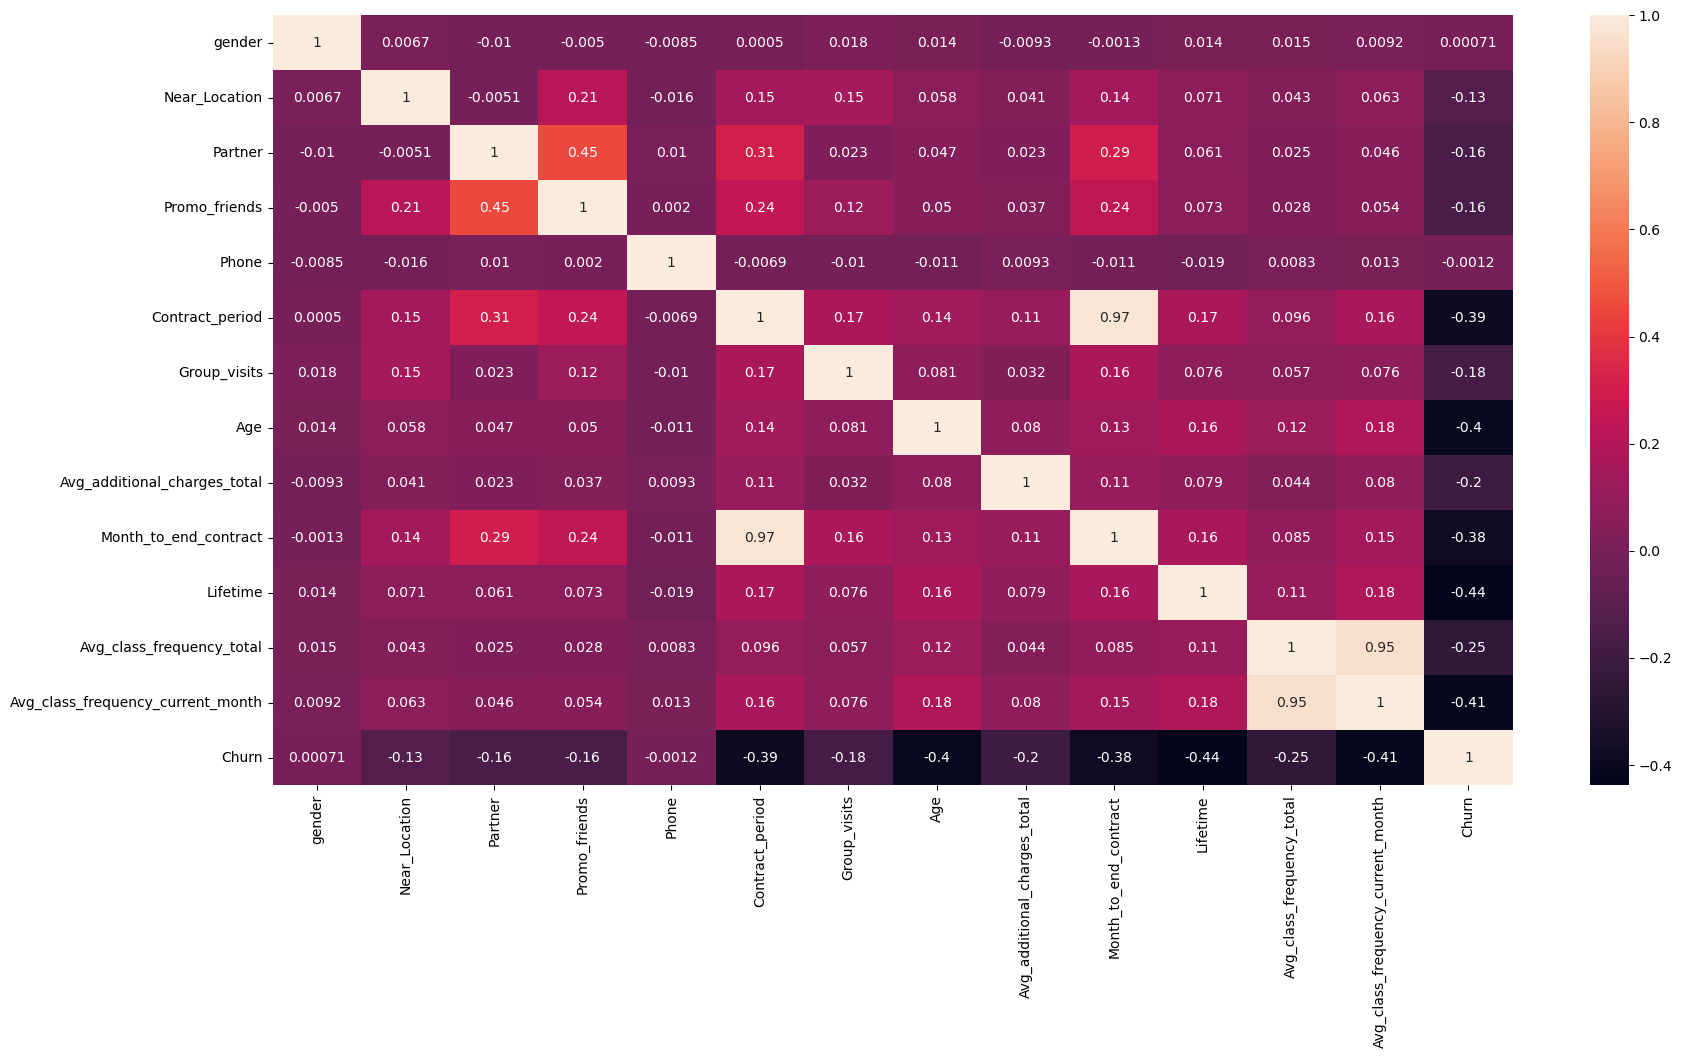

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)


## Membangun model untuk memprediksi churn pengguna

In [9]:
#membagi data menjadi training dan test dengan komposisi 80% dan 20%
X = df.drop(columns='Churn',axis=1)
y = df['Churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
#melatih data dengan metode LogisticRegression dengan random_state 42
model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

C:\Users\laure\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [11]:
#melihat prediksi
y_prob = model.predict_proba(X_test)
y_pred = model.predict(X_test) 

In [12]:
print('Accuracy score for logistic regression is: {:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Precision score for logistic regression is : {:.2f}'.format(precision_score(y_test,y_pred)))
print('Recall score for logistic regression is : {:.2f}'.format(recall_score(y_test,y_pred)))

Accuracy score for logistic regression is: 0.93
Precision score for logistic regression is : 0.91
Recall score for logistic regression is : 0.82


In [13]:
#melatih data denan metode randomforest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_prob = rf_model.predict_proba(X_test)
y_pred = rf_model.predict(X_test)

In [15]:
print("Accuracy Score for Random Forest is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print('Precision Score for Random Forest is : {:.2f}'.format(precision_score(y_test,y_pred)))
print('Recall Score for Random Forest is : {:.2f}'.format(recall_score(y_test,y_pred)))

Accuracy Score for Random Forest is: 0.93
Precision Score for Random Forest is : 0.88
Recall Score for Random Forest is : 0.85


dari kedua model yang dilatih menggunakan logistic reggression dan random forest diketahui bahwa data model nilainya sudah bagus dan akurat sehingga bisa di proses ke tahap selanjutnya

## Membangun Cluster pengguna

In [16]:
x= df.drop('Churn',axis=1)
sc= StandardScaler()
x_sc = sc.fit_transform(x)

In [17]:
linked = linkage(x_sc,method=  'ward')

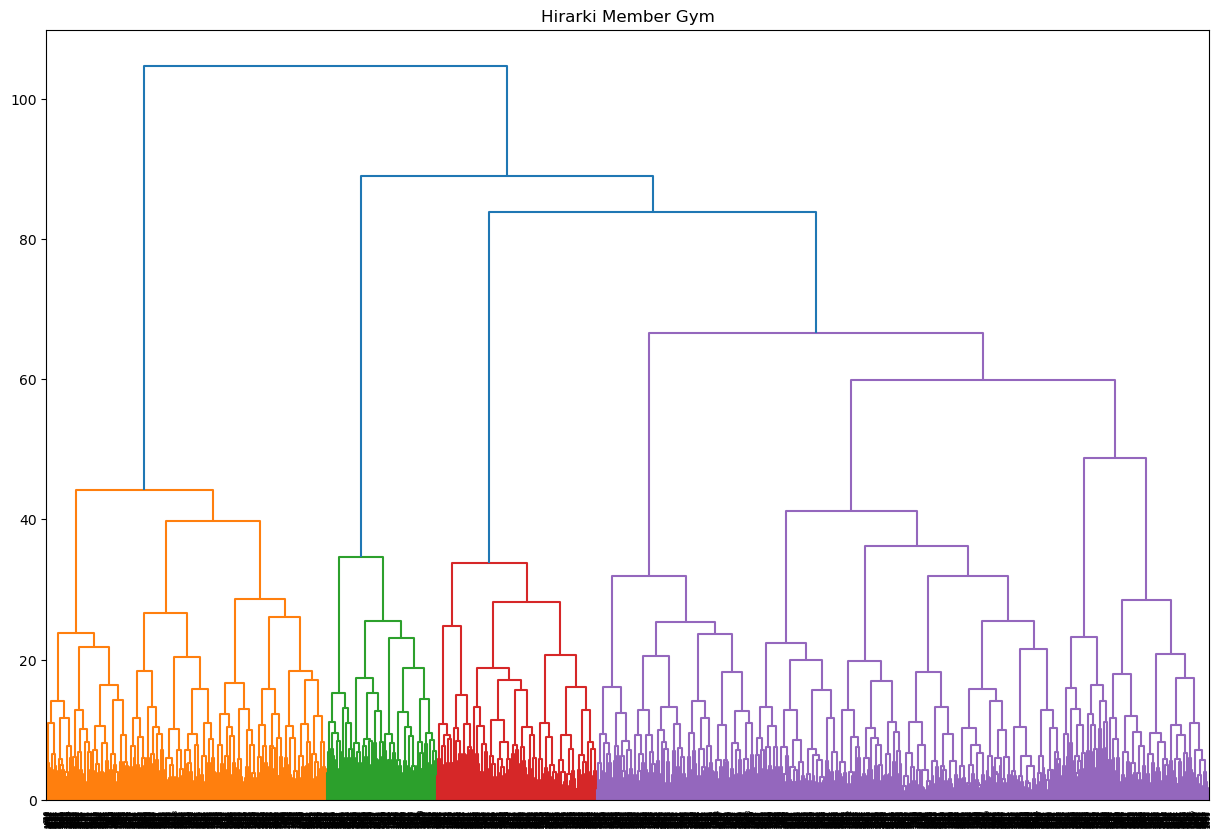

In [18]:
plt.figure(figsize=(15,10))
dendrogram(linked,orientation='top')
plt.title('Hirarki Member Gym')
plt.show()

membuat kelompok hirarki pelanggan berdasarkan kedekatan dan kemiripan, dari dendogram diatass bisa dilihat ada 5 jenis, maksudnya kemiripan ada 5 jenis yang tercipta untuk customer/pelanggan yang ada pada data set

In [19]:
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(x)

membuat cluster pengguna, ada 5 jenis cluster yang tecipta disini, dan pembuatan cluster tergantung dari kemiripan masing masing pelanggan

In [20]:
df['KMeans_cluster'] = labels
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,KMeans_cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,1
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,1
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0,3
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1,3
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0,1
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0,3


membuat kolom berisi pelanggan tersebut termasuk di cluster berapa

In [22]:
#menghitung masing-masing anggota setiap cluster
df.groupby('KMeans_cluster').count()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
KMeans_cluster,,,,,,,,,,,,,,
0,967,967,967,967,967,967,967,967,967,967,967,967,967,967
1,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020,1020
2,277,277,277,277,277,277,277,277,277,277,277,277,277,277
3,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024,1024
4,712,712,712,712,712,712,712,712,712,712,712,712,712,712


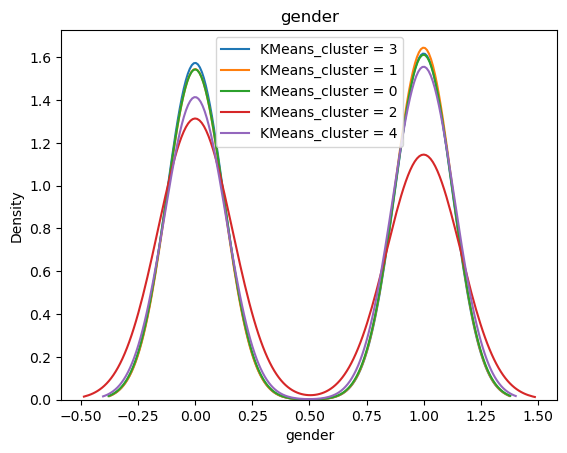

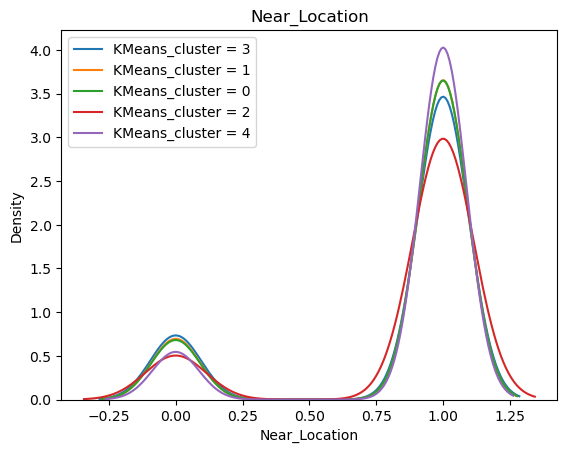

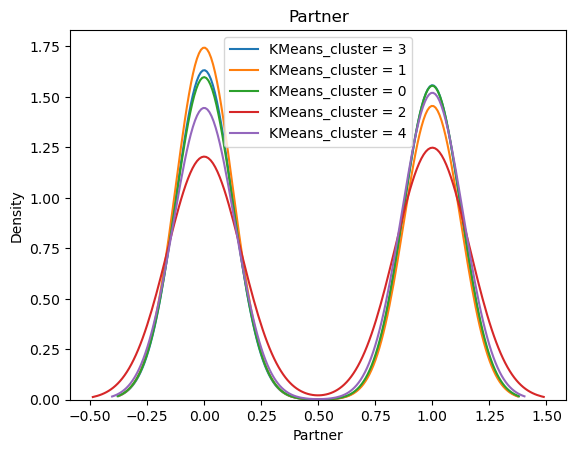

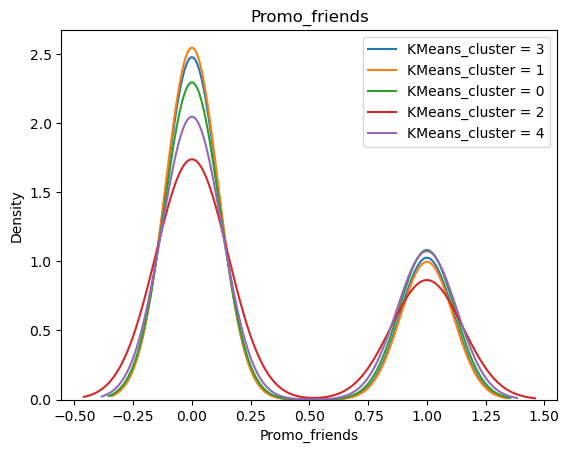

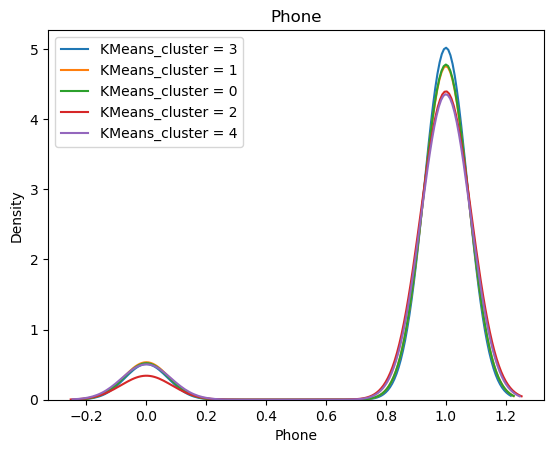

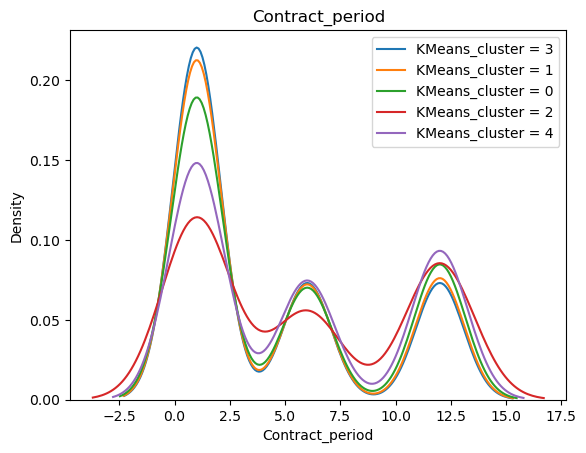

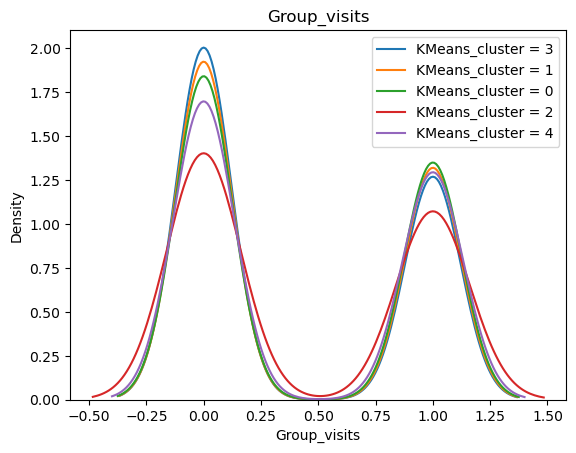

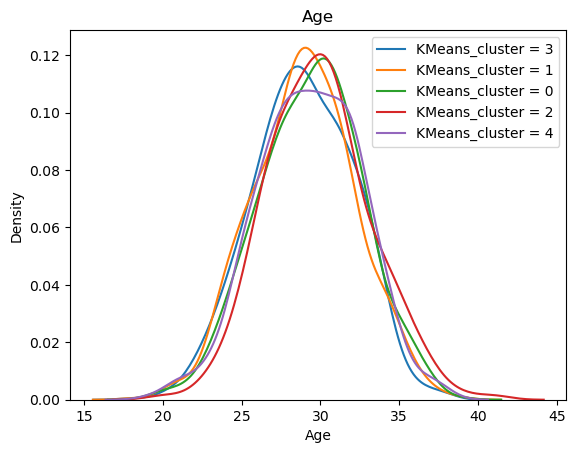

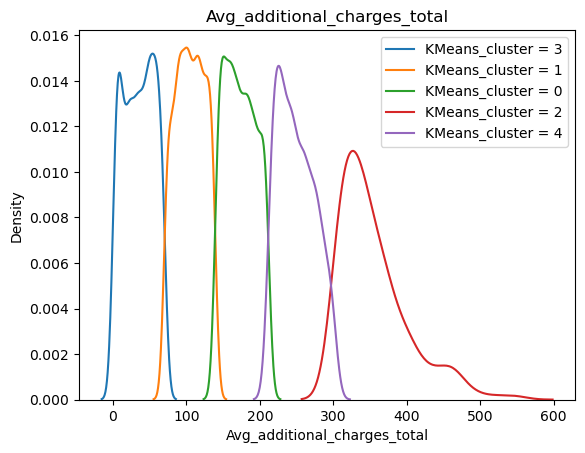

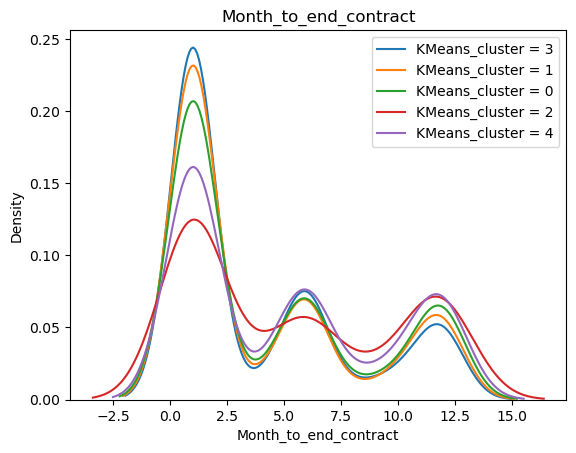

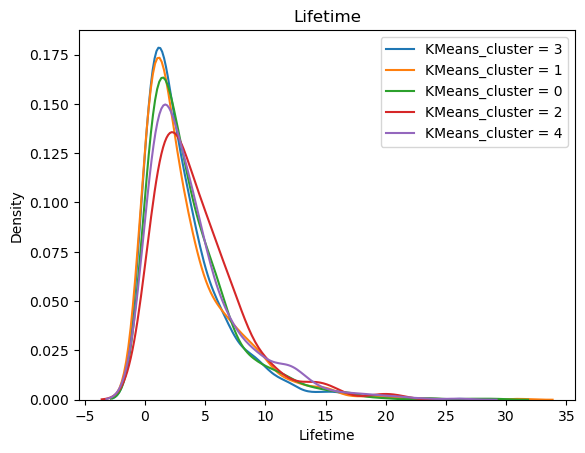

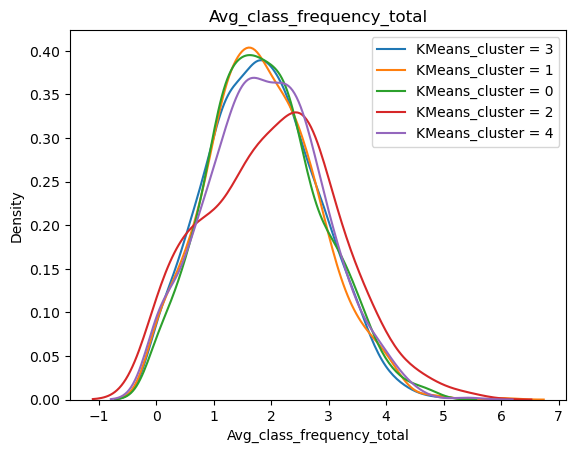

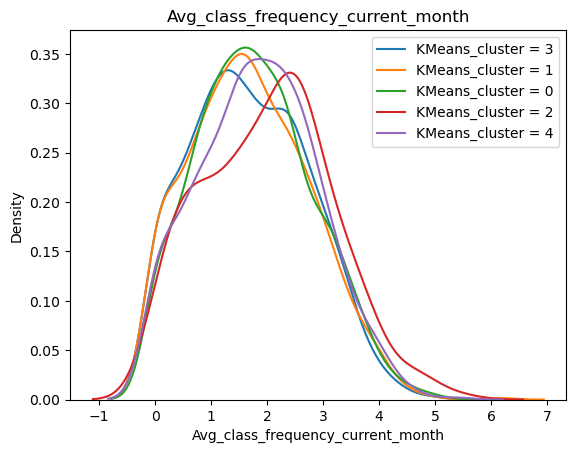

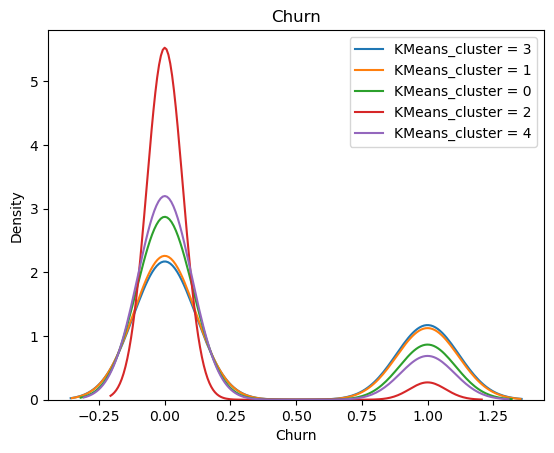

C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\laure\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance

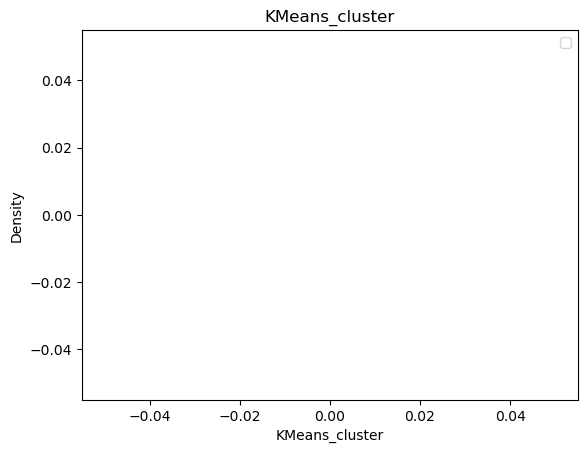

In [24]:
#melihat histogram penyebaran setelah ditambah pengelompokkan pelanggan
histogram(df,'KMeans_cluster',df.columns)

Gender = untuk penyebaran gender setiap cluster hampir sama


Near Location = untuk fitur ini pelanggan yang sering ke gym yang tempat tinggalnya dekat paling banyak berada di cluster 4 walaupun jumlahnya tidak berbeda jauh dengan cluster lainnya


Partner = pada fitur ini untuk member yang tidak memiliki partner gym jumlahnya paling banyak tersebar di cluster 3 sedangakn member yang ada partner gym penyebarannya ada di cluster 1


Promo_friends = terlihat jumlah member yang menggunakan kupon promo_friends untuk pembayaran pertama jumlahnya untuk setiap kluster hampir sama, artinya setiap kluster paling tidak terdapa member yang menggunakan kupon promo dari teman untuk pembayaran pertamanya


Phone = untuk setiap member pada kluster rata-rata di setiap kluster memberikan nomor teleponnya


contract_period = pada fitur ini pelanggan yang memiliki jangka kontrak atau menjadi membership dengan durasi yang panjang tersebar pada cluster 4 dengan hampir 1 tahunan walaupun jumlahnya tidak terlalu signifikan dibanding cluster lainnya yang memiliki durasi membership hampir 1 tahun, sedangkan membership yang jangka waktunya kurang lebih 1-2 bulanan paling banyak tersebar di cluster 1 dan cluster 3


Group_visits = pada fitur ini cluster yang mengambil sesi kelompok penyebarannya tidak berbeda jauh antar kluster, walaupun ada kluster 2 yang jumlah nya paling sedikit membernya yang mengambil sesi kelompok, sedangkan kluster yang tidak mengambil sesi kelompok paling banyak tersebar di kluster 1


Age = untuk penyebaran umur setiap cluster hampir sama, terlihat juga lebih jelas pada tabel rata-rata yang dikelompokkan berdasarkan kluster


Avg_additional_charges_total = untuk fitur ini terlihat member di kluster 2 paling banyak mengeluarkan uang untuk layanan tambahan dibanding pelanggan kluster lain


Month_to_end_contract = untuk member yang sisa kontraknya paling lama penyebarannya ada di kluster 2 dan 4 walaupun perbedaannya tidak terlalu signifikan dengan sisa kontrak atau membership di gym selama 10 bulanan



Lifetime = pada fitur ini perbedaan antara kluster pelanggan tidak terlalu signifikan, rata -rata mereka datang ke gym setelah menjadi member di gym



Avg_class_frequency_total =  untuk fitur ini rata rata pelanggan kluster hampir sama kecuali cluster 2. Member di kluster 2 bisa datang rata rata sebanyak 3 kali selama 1 minggu saat menjadi member,sedangkan untuk pelanggan di kluster lain hanya 1-2 kali selama 1 minggu



Avg_class_frequency_current_month = disini terlihat juga pelanggan yang berada di kluster 2 lebih banyak datang ke gym dalam 1 bulan dengan rata rata perminggu mereka datang sampai 3-4 kali dibanding pelanggan di kluster lain yang dalam 1 bulan dalam setiap minggunya hanya datang 1-2 kali.


Churn = pada fitur ini pelanggan yang nilainya 0 (tidak churn) paling banyak penyebarannya ada di kluster 2 sedangkan pelanggan yang nilainya 1 (churn) penyebarannya hampir merata di setiap kluster dengan perbedaan yang tidak signifikan, denga kluster 2 yang penyebarannya paling rendah untuk yang statusnya 1(churn)



In [28]:
df.groupby('KMeans_cluster')['Churn'].mean()

KMeans_cluster
0    0.231644
1    0.332353
2    0.046931
3    0.350586
4    0.176966
Name: Churn, dtype: float64

## Kesimpulan 

Pada pelanggan kluster 2 terlihat mereka banyak menghabiskan uang mereka untuk layanan tambahan dan mereka sering datang ke GYM dibanding pelanggan kluster lainnya, mungkin sebaiknya mereka diberi layanan khusus tambahan misalnya jika menghabiskan jumlah total tertentu untuk layanan tambahan mereka di beri diskon untuk layanan selanjutnya agar frekuensi mereka datang ke gym dan menggunakan layanan tambahan juga meningkat.


Pelanggan cluster 1 adalah pelanggan yang bisa dibilang melakukan kegiatan yang paling minimal di tempat GYM mereka hanya memiliki member selama 1 bulanan, sedikit menghabiskan uang untuk layanan tambahan mungkin sebaiknya ini tipe customer yang paling kita perhatikan, misalnya dengan memberikan diskon untuk layanan tambahan pada pelanggan di kluster ini agar mereka mencoba, sehingga dengan demikian mereka jadi berlangganan layanan tambahan.

Sebaiknya menambah benefit jika member berlangganan kontrak dengan durasi yang lama, misalnya jika berlangganan durasi member selama 1 tahun langsung mendapat diskon 10 % untuk semua layanan tambahan, jika berlangganan 5 bulan mendapat diskon 2% untuk layanan tambahan. Tujuannya agar member ini tidak hanya datang dalam 1 bulan saja dan mereka pasti ada yang berpikiran 'sayang datang ke gym padahal sudah berlangganan tahunan' sehingga frekuensi mereka datang ke gym menjadi meningkat dengan demikian kesempatan mereka menggunakan layanan tambahan juga meningkat dan ini akan menambah penghasilan gym.

Karena pada GYM ini mempunyai sebagian besar nomor telepon pelanggan maka sebaiknya lebih banyak mengirimkan promo lewat handphone pelanggan. Misalnya pada tanggal 20-30 Agustus untuk layanan tambahan pijat ada diskon 10% sehingga menarik pelanggan untuk mencoba layanan pijat ini karena sedang diskon.


Pada Promo Friends sebaiknya benefitnya ditambah agar member mengajak temannya yang bukan member ke gym ini dan lalu menjadikannya member di gym, misalnya disisi yang mengajak mendapat benefit diskon 50% untuk layanan tambahan dan disisi yang diajak ada keringanan biaya untuk awal menjadi anggota gym.